In [1]:
import numpy as np
import os 
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from sklearn import *
from sklearn.metrics.pairwise import *
import pandas as pd
import warnings
import time
from sklearn import datasets
from scipy.cluster.hierarchy import dendrogram
from numpy import isnan
from pandas import read_csv
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from scipy.stats import *
from sklearn.metrics.pairwise import cosine_distances
from scipy.cluster.hierarchy import linkage, fcluster
from sklearn.metrics.cluster import adjusted_rand_score
from sklearn.metrics.pairwise import euclidean_distances

In [13]:
df_genomica_oc =  pd.read_csv(r"C:\Users\matti\OneDrive\Desktop\Tirocinio\Genomica\Vivi con ricorrenza\QUELLI CHE USO\recidivi_oc_features.csv", index_col=0)

In [15]:
df_genomica_hy = pd.read_csv(r"C:\Users\matti\OneDrive\Desktop\Tirocinio\Genomica\Vivi con ricorrenza\QUELLI CHE USO\recidivi_hy_features.csv", index_col=0)

In [17]:
df_genomica_la =  pd.read_csv(r"C:\Users\matti\OneDrive\Desktop\Tirocinio\Genomica\Vivi con ricorrenza\QUELLI CHE USO\recidivi_la_features.csv", index_col=0)

In [19]:
df_genomica_op =  pd.read_csv(r"C:\Users\matti\OneDrive\Desktop\Tirocinio\Genomica\Vivi con ricorrenza\QUELLI CHE USO\recidivi_op_features.csv", index_col=0)

In [27]:
df_genomica_la

,0,1,2,3,4,5,6,7,8,9,...,26894,26895,26896,26897,26898,26899,26900,26901,26902,26903
SS_UDUS129,0.470039,-0.595321,-0.754242,-0.636522,0.216943,0.063907,-0.748356,-0.265707,1.812039,-0.395198,...,0.687820,-0.995566,-1.207461,-0.189189,-0.448172,-1.019110,-0.518803,-0.159759,-0.936707,-0.866075
SS_MAASTRO_215,-0.050012,0.393015,-0.668721,-1.111748,-0.187503,0.148586,-0.676360,-0.103481,1.584603,-0.966618,...,0.484675,1.088108,-0.531230,-0.974257,-1.432560,-0.913150,0.003457,-0.225695,-0.347909,-0.653444
SS_MAASTRO_416,0.318561,-0.623597,-0.345851,-0.852329,-0.051767,-0.367635,-0.737963,-0.362189,1.576588,-0.275053,...,0.884946,-0.541907,-0.144349,-0.411203,-0.177025,-0.885005,-0.296837,0.095275,-0.748855,-0.759747
SS_MAASTRO_8118,-0.185007,-0.790678,-0.499270,-0.847817,-0.065016,0.294958,-1.007805,-0.202149,1.883415,-0.533554,...,1.237747,-0.853531,-0.807820,-0.544981,-0.539268,-0.819247,-0.322140,-0.167866,-0.316427,-1.030661
SS_INT_MI_0034,0.447342,-0.274711,-0.301856,-1.007622,0.621069,-0.372433,-0.687313,-0.285569,1.799156,-0.470154,...,0.409339,-0.861040,-0.817608,-0.551589,-0.459296,-0.828466,-0.155274,0.203038,-0.899043,-1.110772
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SS_VUMC_HPL_7464,0.253040,0.395856,-0.603859,-0.889491,0.931418,0.717193,-1.139420,-0.425338,1.152783,-0.139705,...,0.445842,-0.803802,-0.918055,-0.639563,0.460124,-0.439620,-0.004030,0.053097,-1.046589,-0.553873
SS_VUMC_HPL_3711,0.522150,-0.411490,-1.003724,-1.010691,0.250419,0.027460,-0.996756,0.306158,1.149221,-0.947984,...,0.772978,-1.177910,-0.662318,0.131972,-0.920114,-0.829537,-0.132791,-0.272141,-1.003724,-0.954951
SS_VUMC_HPL_8612,0.575902,-0.827952,-0.930258,-0.856371,0.109845,-0.503986,-0.566506,-0.310743,1.087428,0.053009,...,0.610003,-0.469884,-0.941625,-0.839320,-0.339161,-0.680178,-0.214121,-0.032246,-1.078032,-1.066664
SS_VUMC_HPL_4174,0.116059,-0.461632,-0.766827,-0.968474,-0.031089,-0.461632,-0.717778,-0.423483,1.058893,0.361304,...,0.383104,-0.755927,-0.919424,-0.516131,-0.336284,-0.810426,-0.216386,-0.058339,-0.690528,-1.012073


In [29]:
df_for_ari =pd.read_csv(r"C:\Users\matti\OneDrive\Desktop\Tirocinio\Genomica\Vivi con ricorrenza\QUELLI CHE USO\pazienti_con_recidiva_colonne_ARI.csv", index_col=0)

In [31]:
df_for_ari

,Type,Patient_ID,Study_Name,Study_OID,Study_Start_Date,clinical_Age_at_Diagnosis,clinical_Date_of_first_Diagnosis,clinical_Hospital,clinical_Sex,ctn_Anatomical_Tumor_Location,...,Other,RT,Surgery,follow_Type_of_Recurrence_Delayed lymp node metastasis,follow_Type_of_Recurrence_Distant metastasis,follow_Type_of_Recurrence_Local,follow_Type_of_Recurrence_Locoregional,follow_Type_of_Recurrence_Regional,follow_Type_of_Recurrence_Second primary tumor,Study_Start_Date_Year
SS_UDUS148,oc,SS_UDUS148,UDUS,SE_UDUS_PROSP,2018-01-06,73,2016-03-01,UDUS,Female,C04.9,...,0,0,1,1,0,0,0,0,0,2018
SS_INT_MI_0045,oc,SS_INT_MI_0045,INT,SE_INT_PROSP,2017-11-14,66,2015-10-01,INT,Female,C04,...,0,0,0,0,0,0,1,0,0,2017
SS_INT_MI_0103,oc,SS_INT_MI_0103,INT,SE_INT_PROSP,2017-11-14,75,2016-02-01,INT,Female,C06.2,...,0,0,0,0,0,1,0,0,0,2017
SS_INT_MI_0055,oc,SS_INT_MI_0055,INT,SE_INT_PROSP,2017-11-14,68,2016-04-15,INT,Male,C01,...,0,0,0,0,0,0,1,0,0,2017
SS_INT_0064,oc,SS_INT_0064,INT,SE_INT_PROSP,2017-08-04,32,2017-05-17,INT,Male,C02.1,...,0,0,1,0,0,0,0,1,0,2017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SS_VUMC_HPL_7464,la,SS_VUMC_HPL_7464,VUMC,SE_VUMC_RETRO,2018-05-14,71,2011-10-07,VUMC,Female,C32.1,...,0,0,0,0,0,0,0,1,0,2018
SS_VUMC_HPL_3711,la,SS_VUMC_HPL_3711,VUMC,SE_VUMC_RETRO,2018-05-16,85,2013-11-11,VUMC,Male,C32.1,...,0,0,1,0,0,1,0,0,0,2018
SS_VUMC_HPL_8612,la,SS_VUMC_HPL_8612,VUMC,SE_VUMC_RETRO,2018-05-16,57,2014-05-05,VUMC,Male,C32.0,...,0,0,0,0,1,0,0,0,0,2018
SS_VUMC_HPL_4174,la,SS_VUMC_HPL_4174,VUMC,SE_VUMC_RETRO,2018-05-17,66,2014-08-12,VUMC,Female,C32.0,...,0,0,1,0,0,1,0,0,0,2018


In [191]:
# # cu = df_for_ari.index[0]
# # # Filtra le righe dove 'Patient_ID' è uguale a 'c' e seleziona solo le colonne a partire da indice 558
# # filtered_values = df_recidva.loc[df_recidva['Patient_ID'] == cu, df_recidva.columns[558:]]
# # # c = filtered_values['Recurrence_Tumor']
# # filtered_values.columns[0]
# patient = df_for_ari.index
# df_recidva_filtered = df_recidva[df_recidva['Patient_ID'].isin(df_for_ari.index)]

# # Itera su ogni paziente filtrato
# for p in df_recidva_filtered['Patient_ID']:
#     filtered_values = df_recidva.loc[df_recidva['Patient_ID'] == p, df_recidva.columns[558:]]
#     for col in filtered_values.columns:
#         if col not in df_for_ari.columns:
#             df_for_ari[col] = np.nan
#         df_for_ari.at[p, col] = filtered_values[col].values[0] 
    

In [203]:
df_for_ari.to_csv(r"C:\Users\matti\OneDrive\Desktop\Tirocinio\Genomica\Vivi con ricorrenza\df_for_ari.csv", index=True, header=True)


In [33]:
scaler = StandardScaler()

df_genomica_oc_scaled = scaler.fit_transform(df_genomica_oc.T)
df_genomica_op_scaled = scaler.fit_transform(df_genomica_op.T)
df_genomica_hy_scaled = scaler.fit_transform(df_genomica_hy.T)
df_genomica_la_scaled = scaler.fit_transform(df_genomica_la.T)


In [37]:
df_genomica_oc_scaled = pd.DataFrame(df_genomica_oc_scaled, columns=df_genomica_oc.T.columns)
df_genomica_op_scaled = pd.DataFrame(df_genomica_op_scaled, columns=df_genomica_op.T.columns)
df_genomica_hy_scaled = pd.DataFrame(df_genomica_hy_scaled, columns=df_genomica_hy.T.columns)
df_genomica_la_scaled = pd.DataFrame(df_genomica_la_scaled, columns=df_genomica_la.T.columns)

In [39]:
combined_dataset = pd.concat([df_genomica_oc_scaled.T,df_genomica_op_scaled.T,df_genomica_hy_scaled.T,df_genomica_la_scaled.T])

In [41]:
combined_dataset

,0,1,2,3,4,5,6,7,8,9,...,26894,26895,26896,26897,26898,26899,26900,26901,26902,26903
SS_UDUS148,2.892422,-0.226992,-0.625910,-0.449340,0.243863,-0.305467,-0.815560,-0.383943,2.061886,-0.710926,...,0.708178,-0.737084,-1.018289,-0.763243,-0.115817,-0.939813,-0.527815,-0.096199,-0.318547,-0.776322
SS_INT_MI_0045,1.181239,-0.407873,-0.937577,-0.645136,-0.280964,-0.198198,-0.623065,-0.595476,1.815780,-0.518228,...,0.033547,-0.600994,-1.003790,-0.578923,-0.694796,-0.783080,-0.479603,-0.209234,-0.970683,-0.474086
SS_INT_MI_0103,0.965505,-0.586660,-0.771575,-0.793989,-0.211227,-0.659505,-0.726747,-0.480194,2.002150,0.024120,...,0.399553,-0.838817,-0.866834,-0.687523,-0.838817,-0.625884,-0.272865,-0.183209,-0.855627,-1.023732
SS_INT_MI_0055,1.134780,-0.486895,-0.678935,-0.662932,0.366618,-0.721611,-0.780290,-0.454888,2.196336,-0.204169,...,0.249260,-0.598918,-0.886979,-0.785624,-0.524236,-0.865641,-0.310858,-0.396209,-0.769621,-0.860307
SS_INT_0064,0.771911,0.307021,0.029719,-0.557509,0.584324,-0.435170,-1.242609,0.307021,1.383607,-0.418858,...,0.331489,-1.030555,-0.647225,-0.557509,-1.397572,-1.136582,0.869782,-0.288363,-0.671693,-0.516730
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SS_VUMC_HPL_7464,0.253040,0.395856,-0.603859,-0.889491,0.931418,0.717193,-1.139420,-0.425338,1.152783,-0.139705,...,0.445842,-0.803802,-0.918055,-0.639563,0.460124,-0.439620,-0.004030,0.053097,-1.046589,-0.553873
SS_VUMC_HPL_3711,0.522150,-0.411490,-1.003724,-1.010691,0.250419,0.027460,-0.996756,0.306158,1.149221,-0.947984,...,0.772978,-1.177910,-0.662318,0.131972,-0.920114,-0.829537,-0.132791,-0.272141,-1.003724,-0.954951
SS_VUMC_HPL_8612,0.575902,-0.827952,-0.930258,-0.856371,0.109845,-0.503986,-0.566506,-0.310743,1.087428,0.053009,...,0.610003,-0.469884,-0.941625,-0.839320,-0.339161,-0.680178,-0.214121,-0.032246,-1.078032,-1.066664
SS_VUMC_HPL_4174,0.116059,-0.461632,-0.766827,-0.968474,-0.031089,-0.461632,-0.717778,-0.423483,1.058893,0.361304,...,0.383104,-0.755927,-0.919424,-0.516131,-0.336284,-0.810426,-0.216386,-0.058339,-0.690528,-1.012073


In [45]:
df_genomica_oc_scaled

,SS_UDUS148,SS_INT_MI_0045,SS_INT_MI_0103,SS_INT_MI_0055,SS_INT_0064,SS_INT_0105,SS_INT_0148,SS_INT_0157,SS_INT_0016,SS_INT_0069,...,SS_VUMC_OC_7559,SS_VUMC_OC_5735,SS_VUMC_OC_6666,SS_VUMC_218,SS_VUMC_096,SS_VUMC_110,SS_VUMC_166,SS_VUMC_175,SS_VUMC_202,SS_VUMC_205
0,2.892422,1.181239,0.965505,1.134780,0.771911,0.473941,1.067545,0.986769,1.174309,0.598673,...,-0.071374,0.040873,-0.021739,-0.108012,0.057061,0.066772,0.019467,0.096339,0.444423,0.214608
1,-0.226992,-0.407873,-0.586660,-0.486895,0.307021,-0.315187,0.022411,-0.325459,-0.216953,-0.284633,...,1.087222,0.079484,-0.029480,-0.593970,-0.465252,-0.993678,-0.670456,0.595309,-0.354986,-0.570061
2,-0.625910,-0.937577,-0.771575,-0.678935,0.029719,-0.652422,-0.888074,-0.393450,-0.775693,-0.857147,...,0.079093,-0.947565,-0.873296,-0.757981,-0.310765,-0.619402,-0.720531,-0.838238,-0.924057,-0.440363
3,-0.449340,-0.645136,-0.793989,-0.662932,-0.557509,-0.901975,-0.387949,-0.121486,-0.619246,-0.704477,...,-0.680766,-0.669567,-0.586863,-0.593970,-0.708017,-0.719209,-0.965342,-0.608554,-0.659845,-0.602485
4,0.243863,-0.280964,-0.211227,0.366618,0.584324,-0.261230,0.221179,0.177675,0.051242,1.405645,...,0.921708,-0.221681,0.148572,-0.150533,0.572017,-0.107890,-0.180833,0.112180,0.180211,-0.012363
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26899,-0.939813,-0.783080,-0.625884,-0.865641,-1.136582,-0.659166,-0.798308,-0.964575,-0.652770,0.037065,...,-0.944083,-0.685011,-0.377845,-0.721534,-0.840434,-0.669305,-1.020981,-1.115444,-0.869860,-0.693273
26900,-0.527815,-0.479603,-0.272865,-0.310858,0.869782,0.224387,0.080118,0.225269,-0.418100,-0.415494,...,0.936755,0.179872,0.287918,-0.150533,0.307182,0.416097,-0.531358,-0.568953,0.356352,-0.310666
26901,-0.096199,-0.209234,-0.183209,-0.396209,-0.288363,-0.166804,-0.362301,-0.060294,-0.228128,-0.197393,...,0.274700,0.002262,-0.277206,-0.174831,-0.244556,-0.450977,-0.019480,-0.093744,-0.205944,-0.297696
26902,-0.318547,-0.970683,-0.855627,-0.769621,-0.671693,-0.396124,-0.721366,-0.753803,-0.814805,-0.442756,...,-0.786093,-0.708178,-0.912003,-0.745832,-0.928712,-0.974964,-0.720531,-0.822398,-0.666620,-0.998061


In [188]:
from sklearn.metrics.pairwise import cosine_distances
import pandas as pd

# Calcola la distanza del coseno tra le colonne 
cosine_dist_matrix = cosine_distances(df_genomica_oc_scaled.T)

# Creazione di un DataFrame per la matrice di distanza
distance_df = pd.DataFrame(
    cosine_dist_matrix,
    index=df_genomica_oc_scaled.columns,  # Etichette dei pazienti
    columns=df_genomica_oc_scaled.columns  # Etichette dei pazienti
)

In [190]:
from scipy.spatial.distance import squareform

condensed_cosine_dist_matrix = squareform(cosine_dist_matrix)
print(condensed_cosine_dist_matrix)

# output_path = r'C:\Users\matti\OneDrive\Desktop\Tirocinio\Genomica\cosine_dist_condensed.csv'
# pd.DataFrame(condensed_cosine_dist_matrix).to_csv(output_path, index=False, header=False)



[0.18319063 0.16940732 0.18288784 ... 0.23291292 0.24960887 0.07478272]


In [63]:
df_for_ari[df_for_ari['Type'] == 'oc']['Type']

SS_UDUS148        oc
SS_INT_MI_0045    oc
SS_INT_MI_0103    oc
SS_INT_MI_0055    oc
SS_INT_0064       oc
                  ..
SS_VUMC_110       oc
SS_VUMC_166       oc
SS_VUMC_175       oc
SS_VUMC_202       oc
SS_VUMC_205       oc
Name: Type, Length: 154, dtype: object

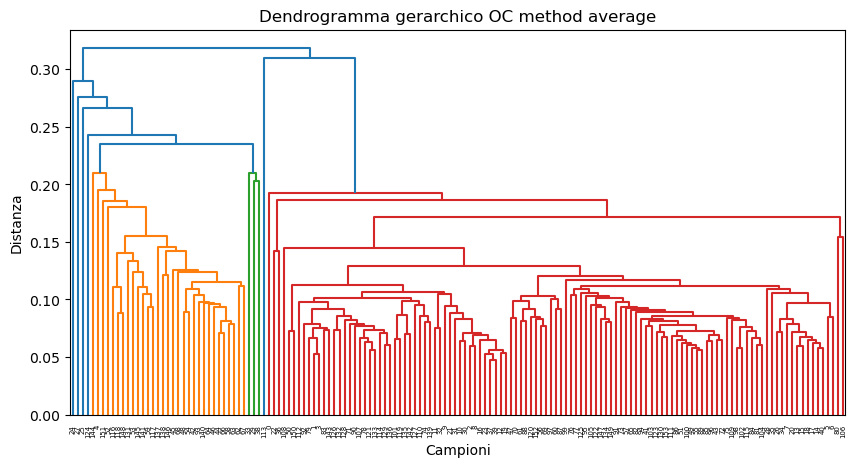

In [192]:
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

# Calcolo della matrice di linkage con il metodo 'complete'
Z = linkage(condensed_cosine_dist_matrix, method='average')

# 🔹 **Visualizzazione del Dendrogramma**
plt.figure(figsize=(10, 5))
dendrogram(Z)  # Nessuna soglia impostata
plt.xlabel("Campioni")
plt.ylabel("Distanza")
plt.title("Dendrogramma gerarchico OC method average")
plt.show()


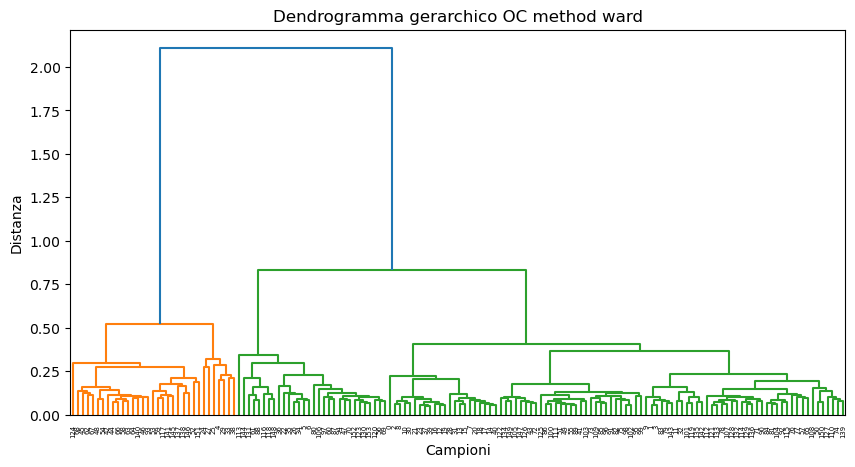

In [100]:
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

# Calcolo della matrice di linkage con il metodo 'complete'
Z = linkage(condensed_cosine_dist_matrix, method='ward')

# 🔹 **Visualizzazione del Dendrogramma**
plt.figure(figsize=(10, 5))
dendrogram(Z)  # Nessuna soglia impostata
plt.xlabel("Campioni")
plt.ylabel("Distanza")
plt.title("Dendrogramma gerarchico OC method ward")
plt.show()


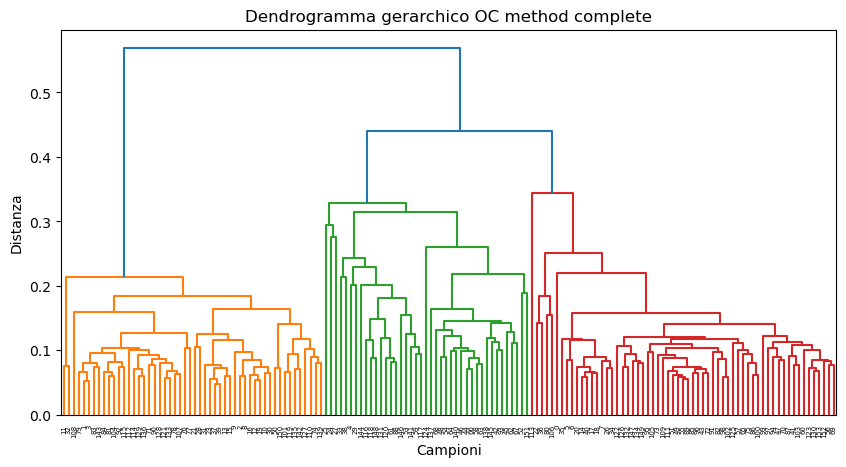

In [110]:
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

# Calcolo della matrice di linkage con il metodo 'complete'
Z = linkage(condensed_cosine_dist_matrix, method='complete')

# 🔹 **Visualizzazione del Dendrogramma**
plt.figure(figsize=(10, 5))
dendrogram(Z)  # Nessuna soglia impostata
plt.xlabel("Campioni")
plt.ylabel("Distanza")
plt.title("Dendrogramma gerarchico OC method complete")
plt.show()


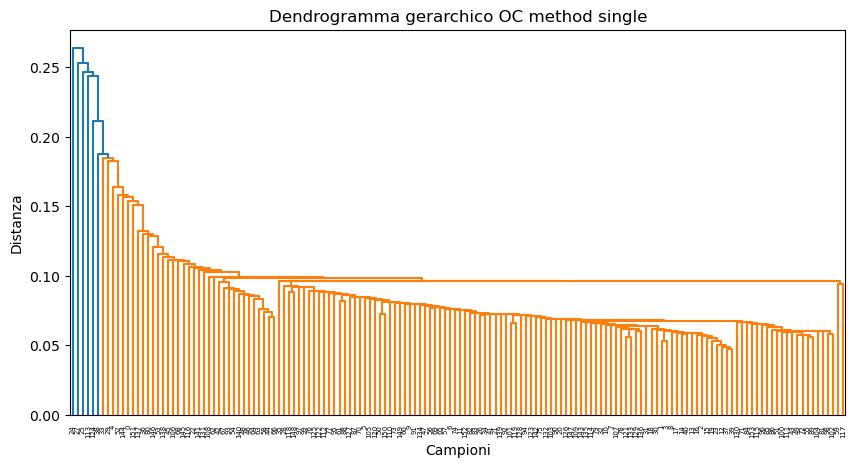

In [112]:

import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

# Calcolo della matrice di linkage con il metodo 'complete'
Z = linkage(condensed_cosine_dist_matrix, method='single')

# 🔹 **Visualizzazione del Dendrogramma**
plt.figure(figsize=(10, 5))
dendrogram(Z)  # Nessuna soglia impostata
plt.xlabel("Campioni")
plt.ylabel("Distanza")
plt.title("Dendrogramma gerarchico OC method single")
plt.show()


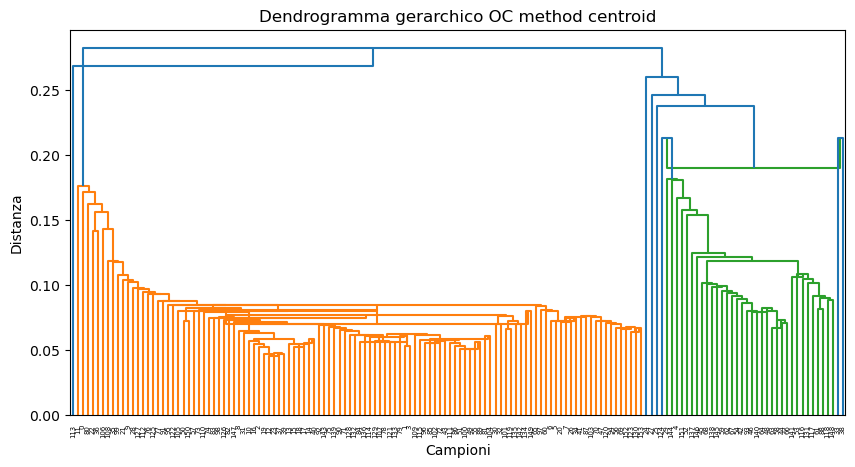

In [114]:

import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

# Calcolo della matrice di linkage con il metodo 'complete'
Z = linkage(condensed_cosine_dist_matrix, method='centroid')

# 🔹 **Visualizzazione del Dendrogramma**
plt.figure(figsize=(10, 5))
dendrogram(Z)  # Nessuna soglia impostata
plt.xlabel("Campioni")
plt.ylabel("Distanza")
plt.title("Dendrogramma gerarchico OC method centroid")
plt.show()


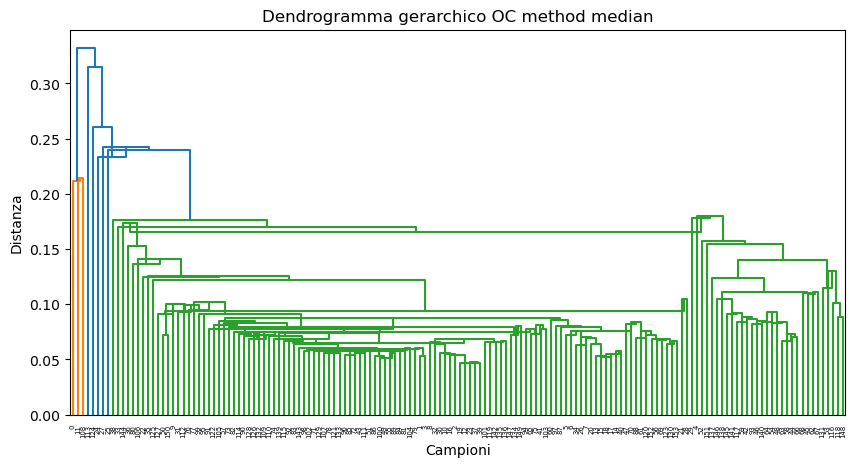

In [116]:

import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

# Calcolo della matrice di linkage con il metodo 'complete'
Z = linkage(condensed_cosine_dist_matrix, method='median')

# 🔹 **Visualizzazione del Dendrogramma**
plt.figure(figsize=(10, 5))
dendrogram(Z)  # Nessuna soglia impostata
plt.xlabel("Campioni")
plt.ylabel("Distanza")
plt.title("Dendrogramma gerarchico OC method median")
plt.show()


_____________________________________________
OP FEATURES

In [194]:
from sklearn.metrics.pairwise import cosine_distances
import pandas as pd

# Calcola la distanza del coseno tra le colonne 
cosine_dist_matrix = cosine_distances(df_genomica_op_scaled.T)

# Creazione di un DataFrame per la matrice di distanza
distance_df = pd.DataFrame(
    cosine_dist_matrix,
    index=df_genomica_op_scaled.columns,  # Etichette dei pazienti
    columns=df_genomica_op_scaled.columns  # Etichette dei pazienti
)

In [196]:

from scipy.spatial.distance import squareform

condensed_cosine_dist_matrix = squareform(cosine_dist_matrix)
print(condensed_cosine_dist_matrix)

# output_path = r'C:\Users\matti\OneDrive\Desktop\Tirocinio\Genomica\cosine_dist_condensed.csv'
# pd.DataFrame(condensed_cosine_dist_matrix).to_csv(output_path, index=False, header=False)



[0.08253206 0.23792954 0.10039111 ... 0.63482157 0.6624494  0.230824  ]


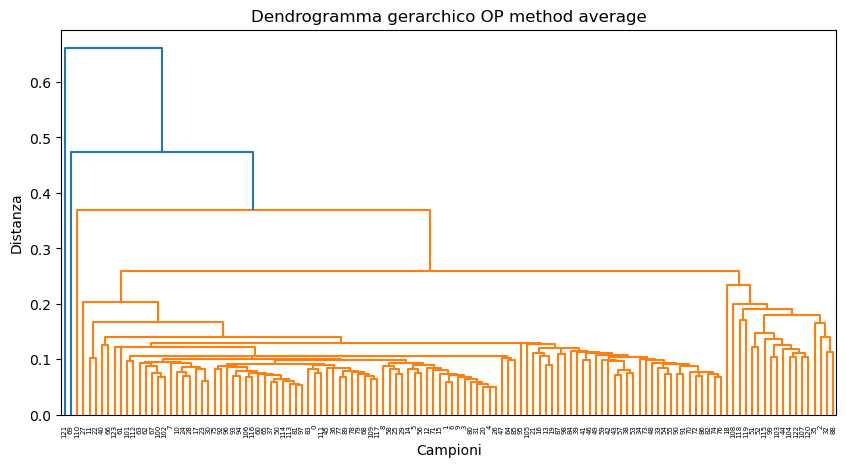

In [198]:
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

# Calcolo della matrice di linkage con il metodo 'complete'
Z = linkage(condensed_cosine_dist_matrix, method='average')

# 🔹 **Visualizzazione del Dendrogramma**
plt.figure(figsize=(10, 5))
dendrogram(Z)  # Nessuna soglia impostata
plt.xlabel("Campioni")
plt.ylabel("Distanza")
plt.title("Dendrogramma gerarchico OP method average")
plt.show()


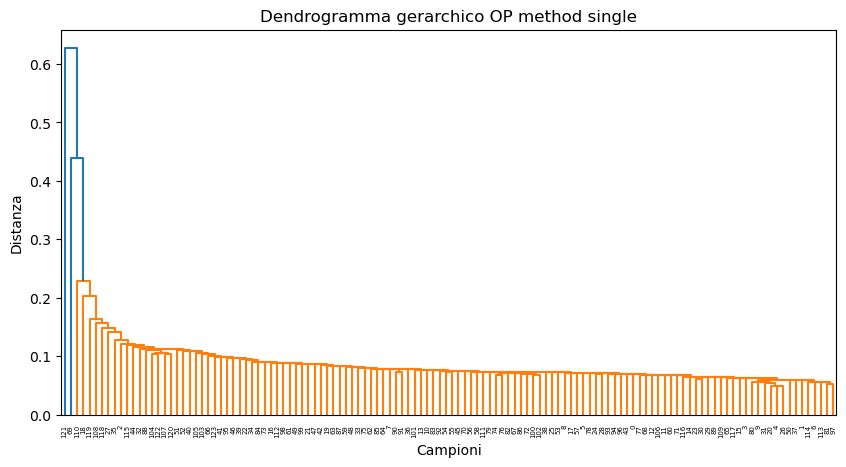

In [129]:
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

# Calcolo della matrice di linkage con il metodo 'complete'
Z = linkage(condensed_cosine_dist_matrix, method='single')

# 🔹 **Visualizzazione del Dendrogramma**
plt.figure(figsize=(10, 5))
dendrogram(Z)  # Nessuna soglia impostata
plt.xlabel("Campioni")
plt.ylabel("Distanza")
plt.title("Dendrogramma gerarchico OP method single")
plt.show()


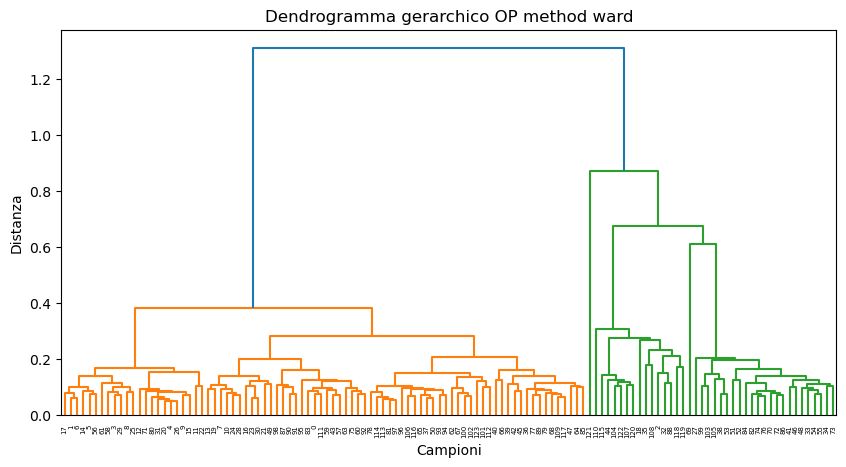

In [127]:
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

# Calcolo della matrice di linkage con il metodo 'complete'
Z = linkage(condensed_cosine_dist_matrix, method='ward')

# 🔹 **Visualizzazione del Dendrogramma**
plt.figure(figsize=(10, 5))
dendrogram(Z)  # Nessuna soglia impostata
plt.xlabel("Campioni")
plt.ylabel("Distanza")
plt.title("Dendrogramma gerarchico OP method ward")
plt.show()


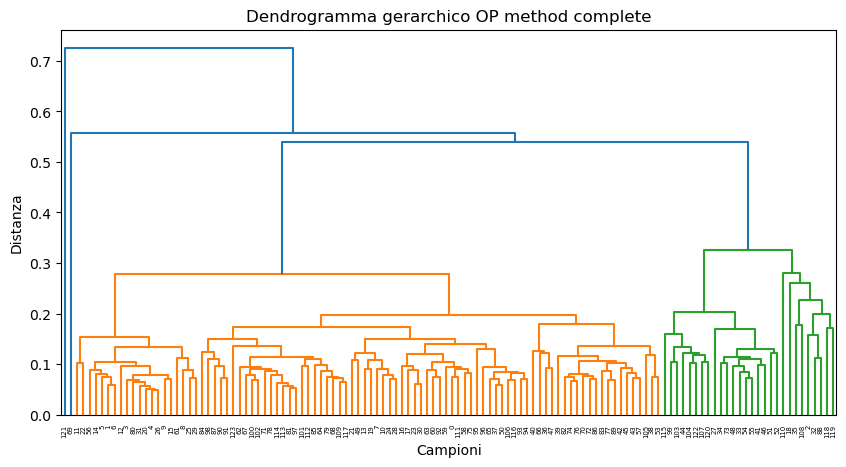

In [131]:
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

# Calcolo della matrice di linkage con il metodo 'complete'
Z = linkage(condensed_cosine_dist_matrix, method='complete')

# 🔹 **Visualizzazione del Dendrogramma**
plt.figure(figsize=(10, 5))
dendrogram(Z)  # Nessuna soglia impostata
plt.xlabel("Campioni")
plt.ylabel("Distanza")
plt.title("Dendrogramma gerarchico OP method complete")
plt.show()


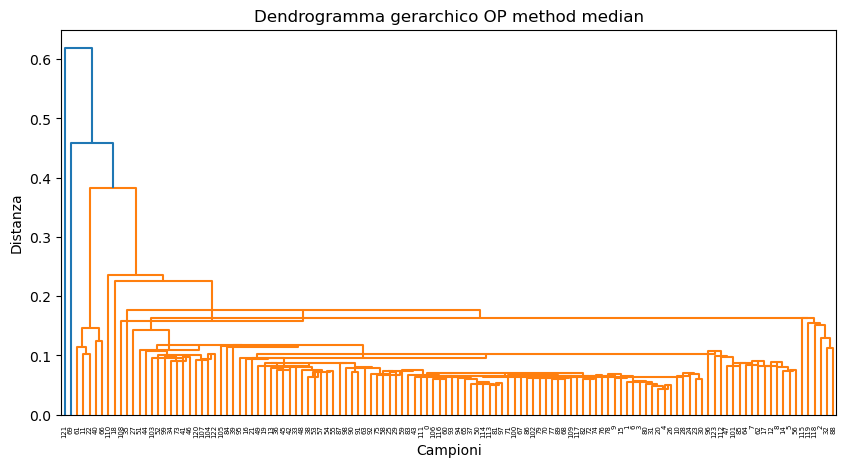

In [133]:
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

# Calcolo della matrice di linkage con il metodo 'complete'
Z = linkage(condensed_cosine_dist_matrix, method='median')

# 🔹 **Visualizzazione del Dendrogramma**
plt.figure(figsize=(10, 5))
dendrogram(Z)  # Nessuna soglia impostata
plt.xlabel("Campioni")
plt.ylabel("Distanza")
plt.title("Dendrogramma gerarchico OP method median")
plt.show()


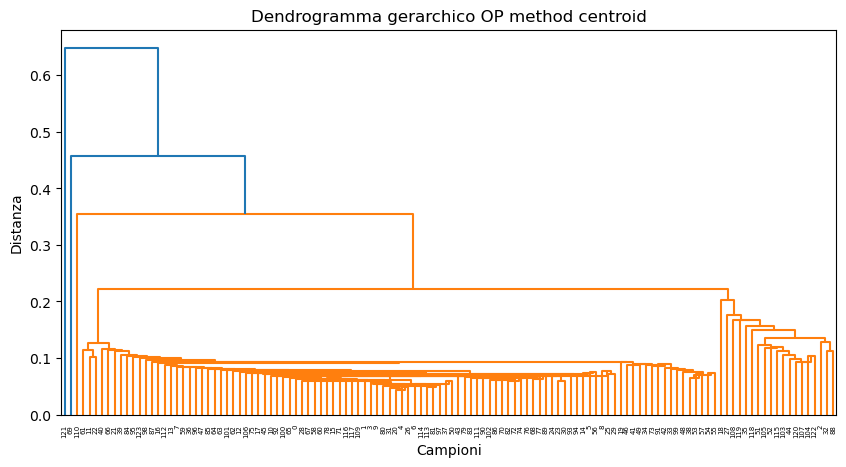

In [135]:
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

# Calcolo della matrice di linkage con il metodo 'complete'
Z = linkage(condensed_cosine_dist_matrix, method='centroid')

# 🔹 **Visualizzazione del Dendrogramma**
plt.figure(figsize=(10, 5))
dendrogram(Z)  # Nessuna soglia impostata
plt.xlabel("Campioni")
plt.ylabel("Distanza")
plt.title("Dendrogramma gerarchico OP method centroid")
plt.show()


____________________________________________
hy features

In [200]:
from sklearn.metrics.pairwise import cosine_distances
import pandas as pd

# Calcola la distanza del coseno tra le colonne 
cosine_dist_matrix = cosine_distances(df_genomica_hy_scaled.T)

# Creazione di un DataFrame per la matrice di distanza
distance_df = pd.DataFrame(
    cosine_dist_matrix,
    index=df_genomica_hy_scaled.columns,  # Etichette dei pazienti
    columns=df_genomica_hy_scaled.columns  # Etichette dei pazienti
)
from scipy.spatial.distance import squareform

condensed_cosine_dist_matrix = squareform(cosine_dist_matrix)
print(condensed_cosine_dist_matrix)

# output_path = r'C:\Users\matti\OneDrive\Desktop\Tirocinio\Genomica\cosine_dist_condensed.csv'
# pd.DataFrame(condensed_cosine_dist_matrix).to_csv(output_path, index=False, header=False)



[0.10577623 0.1044972  0.10323407 ... 0.06135448 0.06465894 0.05639546]


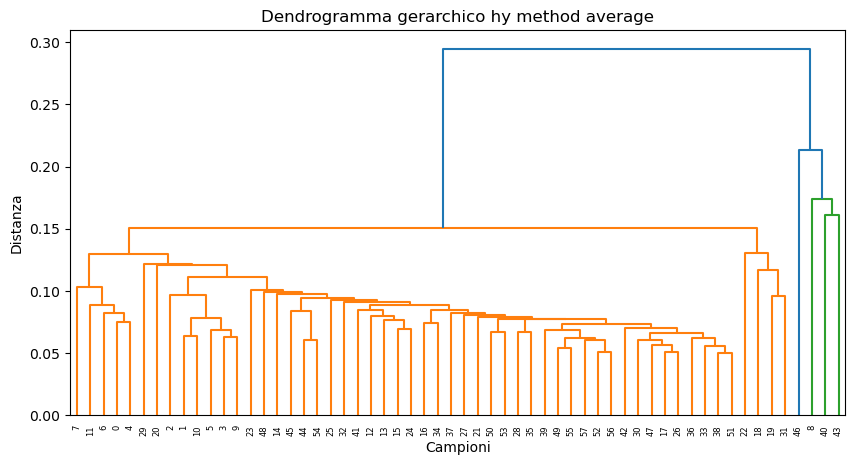

In [202]:
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

# Calcolo della matrice di linkage con il metodo 'complete'
Z = linkage(condensed_cosine_dist_matrix, method='average')

# 🔹 **Visualizzazione del Dendrogramma**
plt.figure(figsize=(10, 5))
dendrogram(Z)  # Nessuna soglia impostata
plt.xlabel("Campioni")
plt.ylabel("Distanza")
plt.title("Dendrogramma gerarchico hy method average")
plt.show()


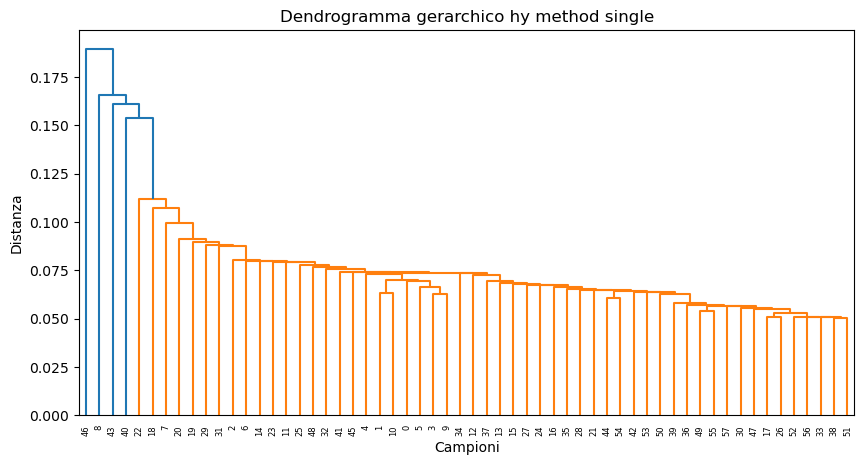

In [140]:
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

# Calcolo della matrice di linkage con il metodo 'complete'
Z = linkage(condensed_cosine_dist_matrix, method='single')

# 🔹 **Visualizzazione del Dendrogramma**
plt.figure(figsize=(10, 5))
dendrogram(Z)  # Nessuna soglia impostata
plt.xlabel("Campioni")
plt.ylabel("Distanza")
plt.title("Dendrogramma gerarchico hy method single")
plt.show()


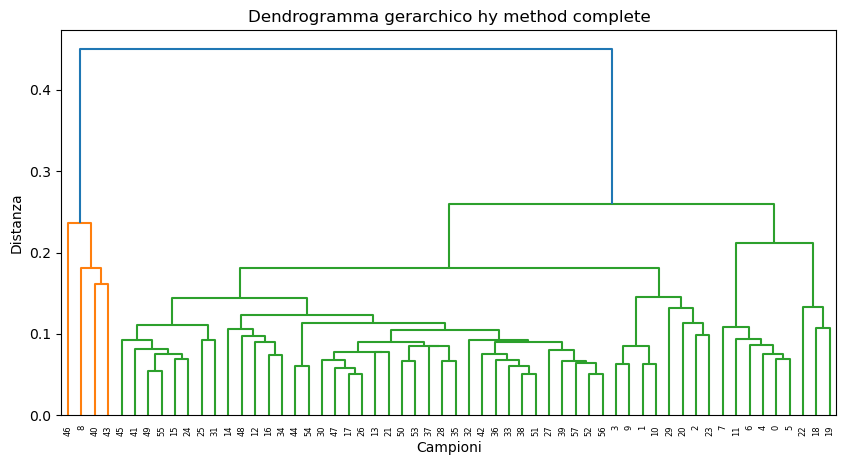

In [142]:
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

# Calcolo della matrice di linkage con il metodo 'complete'
Z = linkage(condensed_cosine_dist_matrix, method='complete')

# 🔹 **Visualizzazione del Dendrogramma**
plt.figure(figsize=(10, 5))
dendrogram(Z)  # Nessuna soglia impostata
plt.xlabel("Campioni")
plt.ylabel("Distanza")
plt.title("Dendrogramma gerarchico hy method complete")
plt.show()


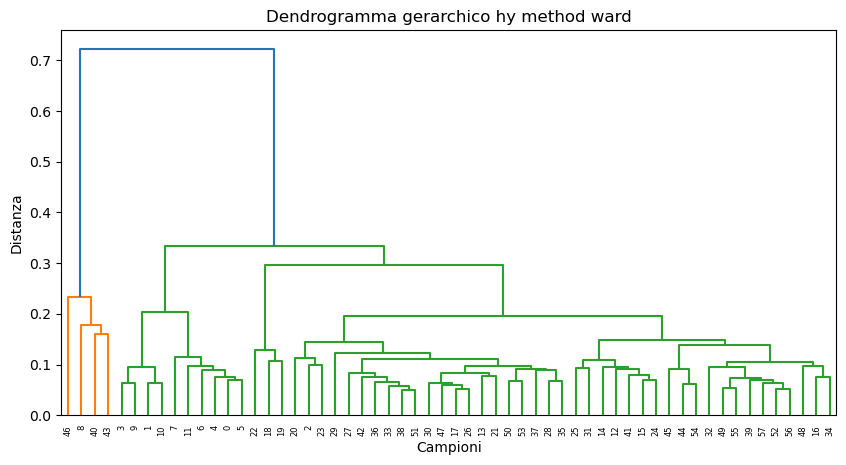

In [144]:
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

# Calcolo della matrice di linkage con il metodo 'complete'
Z = linkage(condensed_cosine_dist_matrix, method='ward')

# 🔹 **Visualizzazione del Dendrogramma**
plt.figure(figsize=(10, 5))
dendrogram(Z)  # Nessuna soglia impostata
plt.xlabel("Campioni")
plt.ylabel("Distanza")
plt.title("Dendrogramma gerarchico hy method ward")
plt.show()


____________________________________________________________________________________________________________
LA FEATURES

In [204]:
from sklearn.metrics.pairwise import cosine_distances
import pandas as pd

# Calcola la distanza del coseno tra le colonne 
cosine_dist_matrix = cosine_distances(df_genomica_la_scaled.T)

# Creazione di un DataFrame per la matrice di distanza
distance_df = pd.DataFrame(
    cosine_dist_matrix,
    index=df_genomica_la_scaled.columns,  # Etichette dei pazienti
    columns=df_genomica_la_scaled.columns  # Etichette dei pazienti
)
from scipy.spatial.distance import squareform

condensed_cosine_dist_matrix = squareform(cosine_dist_matrix)
print(condensed_cosine_dist_matrix)

# output_path = r'C:\Users\matti\OneDrive\Desktop\Tirocinio\Genomica\cosine_dist_condensed.csv'
# pd.DataFrame(condensed_cosine_dist_matrix).to_csv(output_path, index=False, header=False)



[0.30077813 0.11718271 0.08776518 ... 0.06290103 0.34215765 0.39230959]


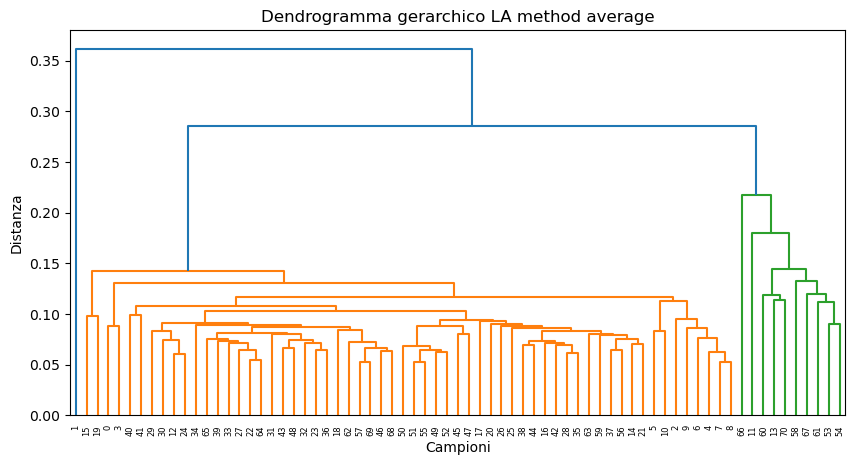

In [206]:
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

# Calcolo della matrice di linkage con il metodo 'complete'
Z = linkage(condensed_cosine_dist_matrix, method='average')

# 🔹 **Visualizzazione del Dendrogramma**
plt.figure(figsize=(10, 5))
dendrogram(Z)  # Nessuna soglia impostata
plt.xlabel("Campioni")
plt.ylabel("Distanza")
plt.title("Dendrogramma gerarchico LA method average")
plt.show()


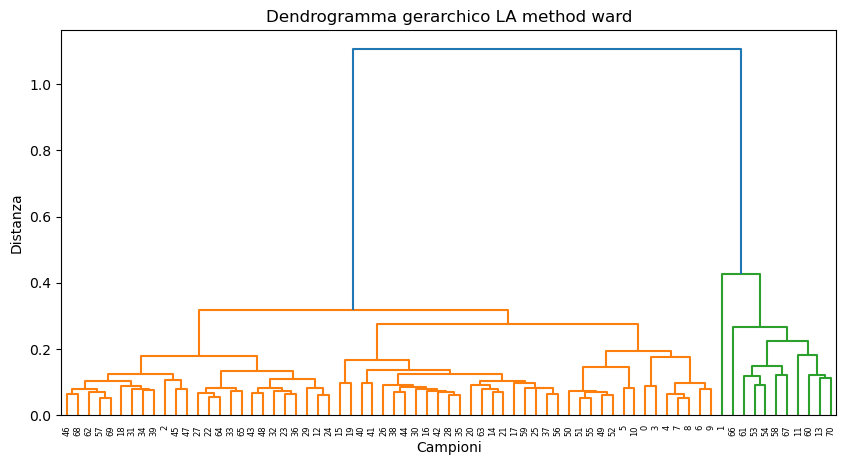

In [151]:
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

# Calcolo della matrice di linkage con il metodo 'complete'
Z = linkage(condensed_cosine_dist_matrix, method='ward')

# 🔹 **Visualizzazione del Dendrogramma**
plt.figure(figsize=(10, 5))
dendrogram(Z)  # Nessuna soglia impostata
plt.xlabel("Campioni")
plt.ylabel("Distanza")
plt.title("Dendrogramma gerarchico LA method ward")
plt.show()


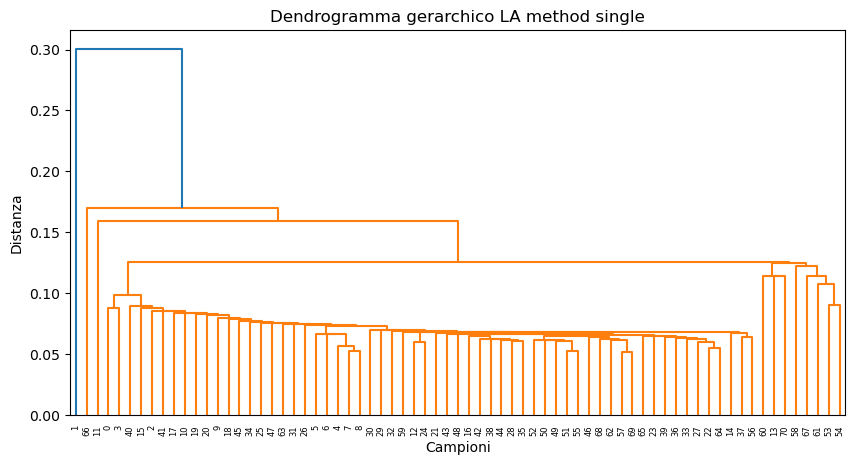

In [153]:
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

# Calcolo della matrice di linkage con il metodo 'complete'
Z = linkage(condensed_cosine_dist_matrix, method='single')

# 🔹 **Visualizzazione del Dendrogramma**
plt.figure(figsize=(10, 5))
dendrogram(Z)  # Nessuna soglia impostata
plt.xlabel("Campioni")
plt.ylabel("Distanza")
plt.title("Dendrogramma gerarchico LA method single")
plt.show()


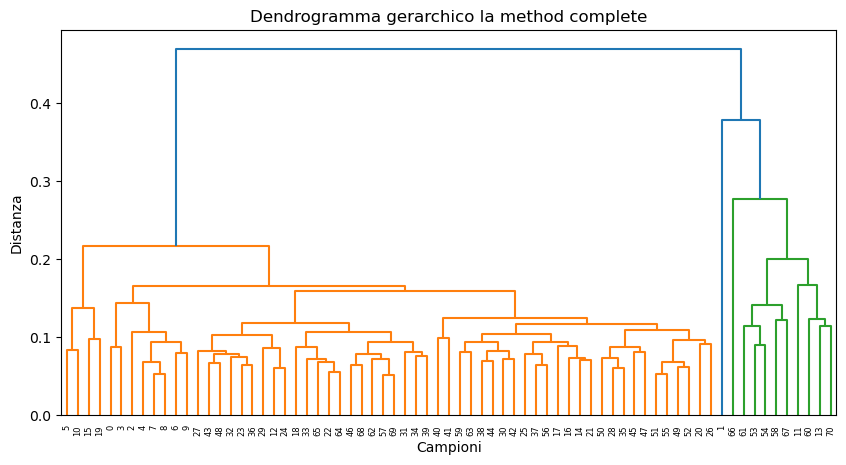

In [155]:
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

# Calcolo della matrice di linkage con il metodo 'complete'
Z = linkage(condensed_cosine_dist_matrix, method='complete')

# 🔹 **Visualizzazione del Dendrogramma**
plt.figure(figsize=(10, 5))
dendrogram(Z)  # Nessuna soglia impostata
plt.xlabel("Campioni")
plt.ylabel("Distanza")
plt.title("Dendrogramma gerarchico la method complete")
plt.show()


_______________________________________________________________________________________________________________
combino tutti e 4

In [157]:
combined_dataset

,0,1,2,3,4,5,6,7,8,9,...,26894,26895,26896,26897,26898,26899,26900,26901,26902,26903
SS_UDUS148,2.892422,-0.226992,-0.625910,-0.449340,0.243863,-0.305467,-0.815560,-0.383943,2.061886,-0.710926,...,0.708178,-0.737084,-1.018289,-0.763243,-0.115817,-0.939813,-0.527815,-0.096199,-0.318547,-0.776322
SS_INT_MI_0045,1.181239,-0.407873,-0.937577,-0.645136,-0.280964,-0.198198,-0.623065,-0.595476,1.815780,-0.518228,...,0.033547,-0.600994,-1.003790,-0.578923,-0.694796,-0.783080,-0.479603,-0.209234,-0.970683,-0.474086
SS_INT_MI_0103,0.965505,-0.586660,-0.771575,-0.793989,-0.211227,-0.659505,-0.726747,-0.480194,2.002150,0.024120,...,0.399553,-0.838817,-0.866834,-0.687523,-0.838817,-0.625884,-0.272865,-0.183209,-0.855627,-1.023732
SS_INT_MI_0055,1.134780,-0.486895,-0.678935,-0.662932,0.366618,-0.721611,-0.780290,-0.454888,2.196336,-0.204169,...,0.249260,-0.598918,-0.886979,-0.785624,-0.524236,-0.865641,-0.310858,-0.396209,-0.769621,-0.860307
SS_INT_0064,0.771911,0.307021,0.029719,-0.557509,0.584324,-0.435170,-1.242609,0.307021,1.383607,-0.418858,...,0.331489,-1.030555,-0.647225,-0.557509,-1.397572,-1.136582,0.869782,-0.288363,-0.671693,-0.516730
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SS_VUMC_HPL_7464,0.253040,0.395856,-0.603859,-0.889491,0.931418,0.717193,-1.139420,-0.425338,1.152783,-0.139705,...,0.445842,-0.803802,-0.918055,-0.639563,0.460124,-0.439620,-0.004030,0.053097,-1.046589,-0.553873
SS_VUMC_HPL_3711,0.522150,-0.411490,-1.003724,-1.010691,0.250419,0.027460,-0.996756,0.306158,1.149221,-0.947984,...,0.772978,-1.177910,-0.662318,0.131972,-0.920114,-0.829537,-0.132791,-0.272141,-1.003724,-0.954951
SS_VUMC_HPL_8612,0.575902,-0.827952,-0.930258,-0.856371,0.109845,-0.503986,-0.566506,-0.310743,1.087428,0.053009,...,0.610003,-0.469884,-0.941625,-0.839320,-0.339161,-0.680178,-0.214121,-0.032246,-1.078032,-1.066664
SS_VUMC_HPL_4174,0.116059,-0.461632,-0.766827,-0.968474,-0.031089,-0.461632,-0.717778,-0.423483,1.058893,0.361304,...,0.383104,-0.755927,-0.919424,-0.516131,-0.336284,-0.810426,-0.216386,-0.058339,-0.690528,-1.012073


In [208]:
from sklearn.metrics.pairwise import cosine_distances
import pandas as pd

# Calcola la distanza del coseno tra le colonne 
cosine_dist_matrix = cosine_distances(combined_dataset)

# Creazione di un DataFrame per la matrice di distanza
distance_df = pd.DataFrame(
    cosine_dist_matrix,
    index=combined_dataset.T.columns,  # Etichette dei pazienti
    columns=combined_dataset.T.columns  # Etichette dei pazienti
)
from scipy.spatial.distance import squareform

condensed_cosine_dist_matrix = squareform(cosine_dist_matrix)
print(condensed_cosine_dist_matrix)

# output_path = r'C:\Users\matti\OneDrive\Desktop\Tirocinio\Genomica\cosine_dist_condensed.csv'
# pd.DataFrame(condensed_cosine_dist_matrix).to_csv(output_path, index=False, header=False)



[0.18319063 0.16940732 0.18288784 ... 0.06290103 0.34215765 0.39230959]


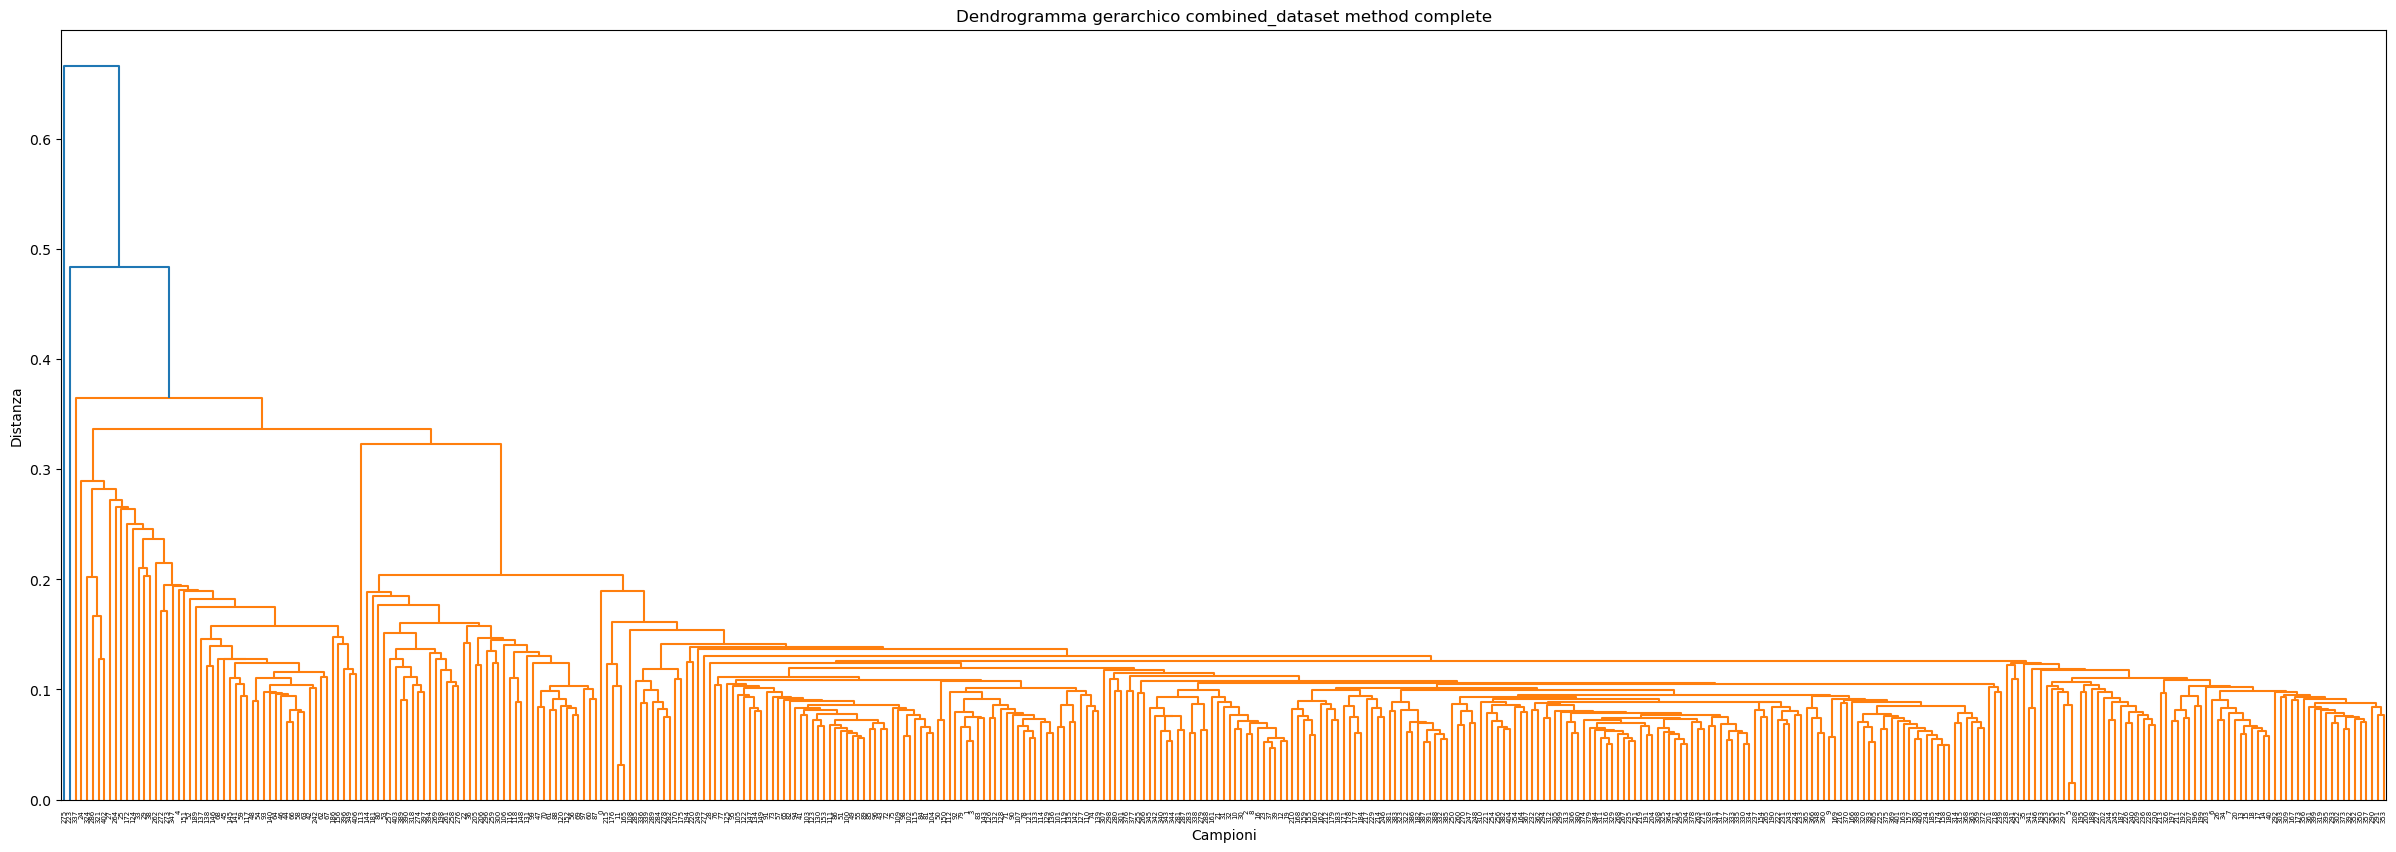

In [222]:
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

# Calcolo della matrice di linkage con il metodo 'complete'
Z = linkage(condensed_cosine_dist_matrix, method='average')
# label = fcluster(Z, t=4, criterion='maxclust')

# ari_r = adjusted_rand_score(df_for_ari['Type'], label)
# print(ari_r)
# 🔹 **Visualizzazione del Dendrogramma**
plt.figure(figsize=(30, 10))
dendrogram(Z)  # Nessuna soglia impostata
plt.xlabel("Campioni")
plt.ylabel("Distanza")
plt.title("Dendrogramma gerarchico combined_dataset method complete")
plt.show()


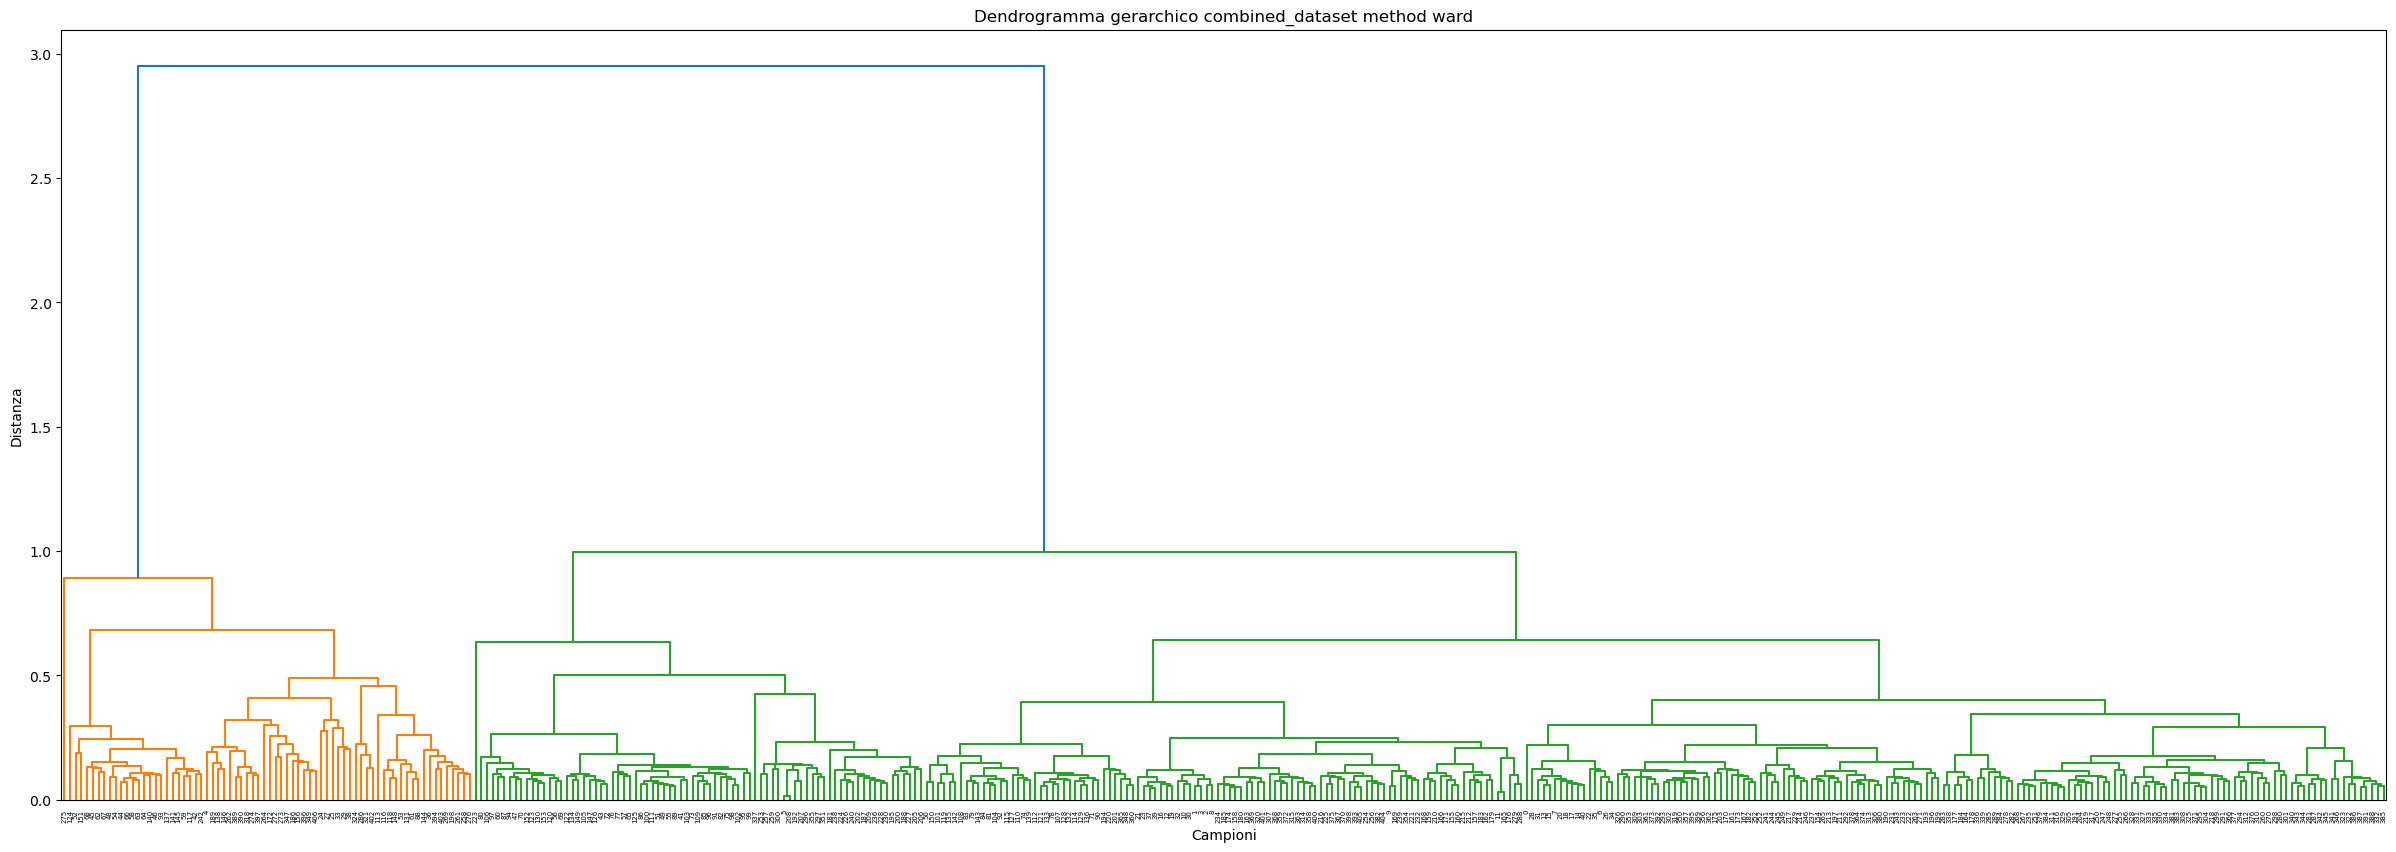

In [178]:
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

# Calcolo della matrice di linkage con il metodo 'complete'
Z = linkage(condensed_cosine_dist_matrix, method='ward')

# 🔹 **Visualizzazione del Dendrogramma**
plt.figure(figsize=(30, 10))
dendrogram(Z)  # Nessuna soglia impostata
plt.xlabel("Campioni")
plt.ylabel("Distanza")
plt.title("Dendrogramma gerarchico combined_dataset method ward")
plt.show()


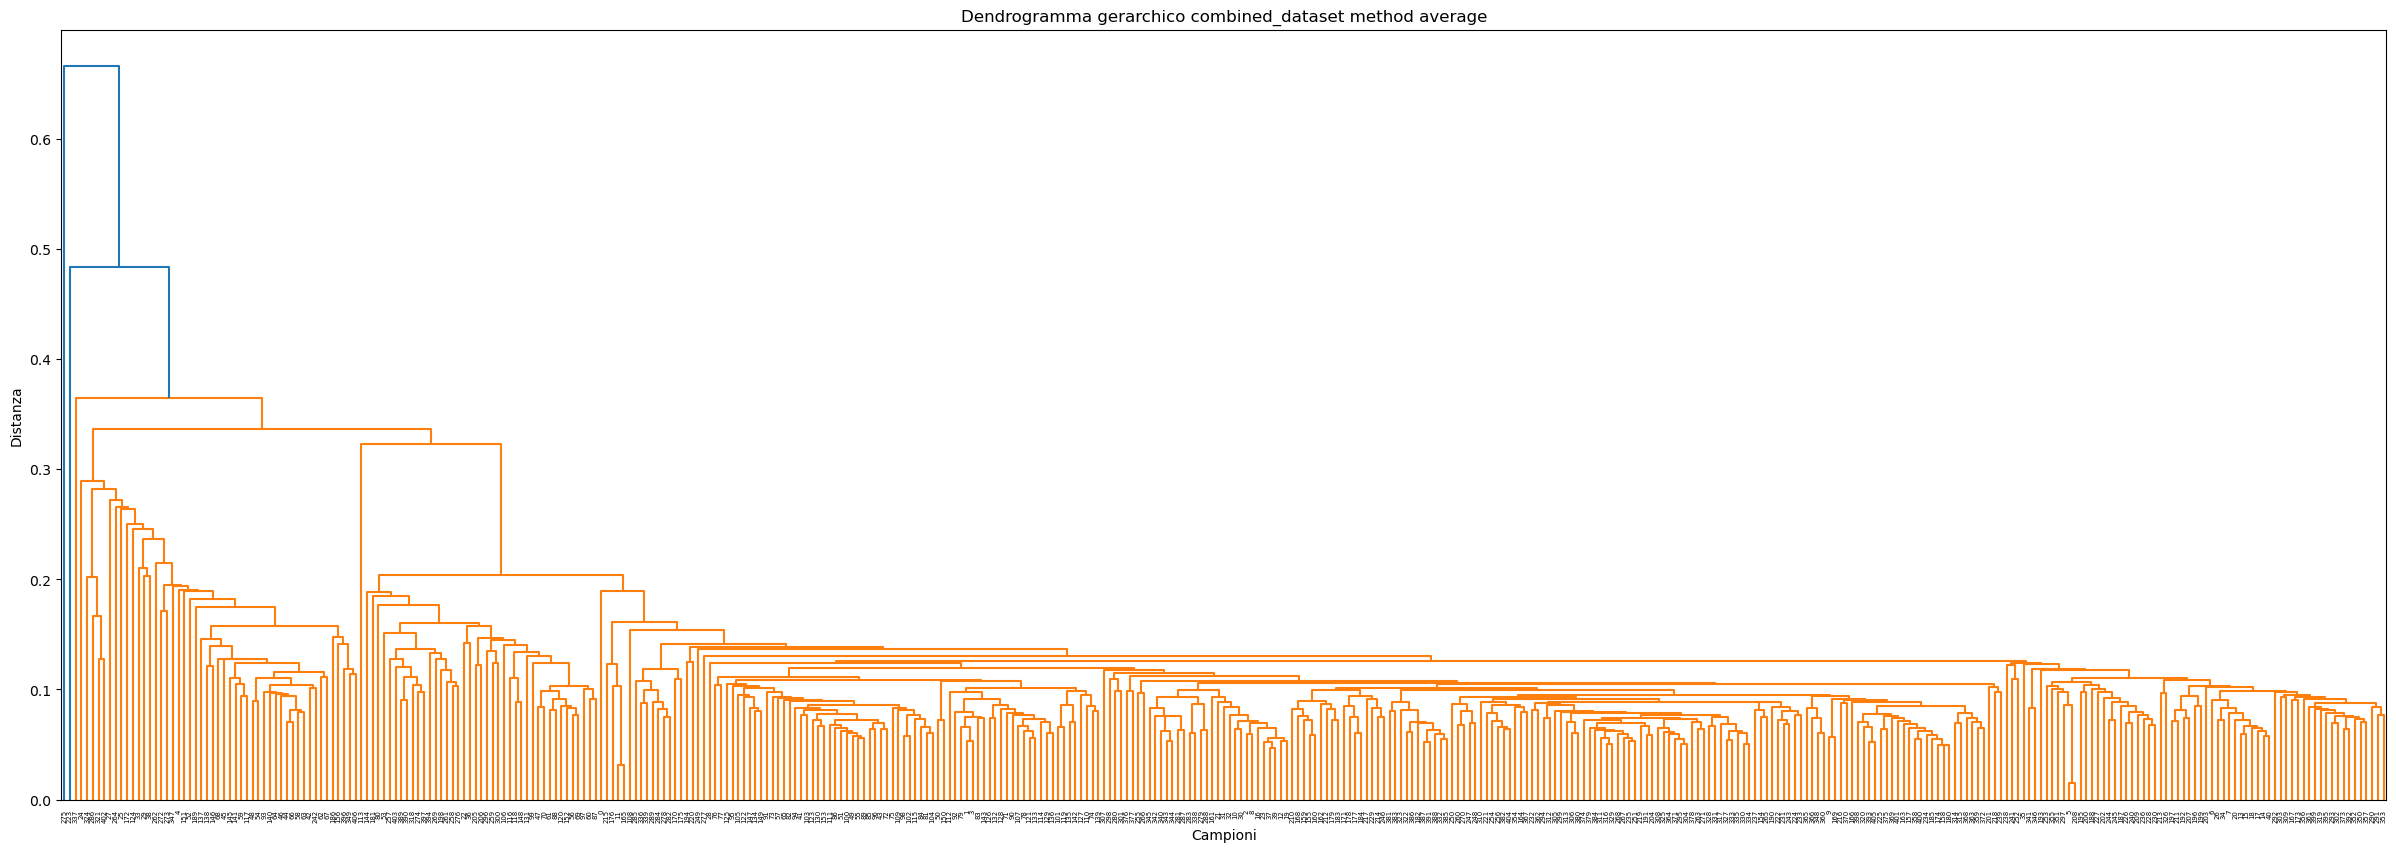

In [184]:
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

# Calcolo della matrice di linkage con il metodo 'complete'
Z = linkage(condensed_cosine_dist_matrix, method='average')

# 🔹 **Visualizzazione del Dendrogramma**
plt.figure(figsize=(30, 10))
dendrogram(Z)  # Nessuna soglia impostata
plt.xlabel("Campioni")
plt.ylabel("Distanza")
plt.title("Dendrogramma gerarchico combined_dataset method average")
plt.show()


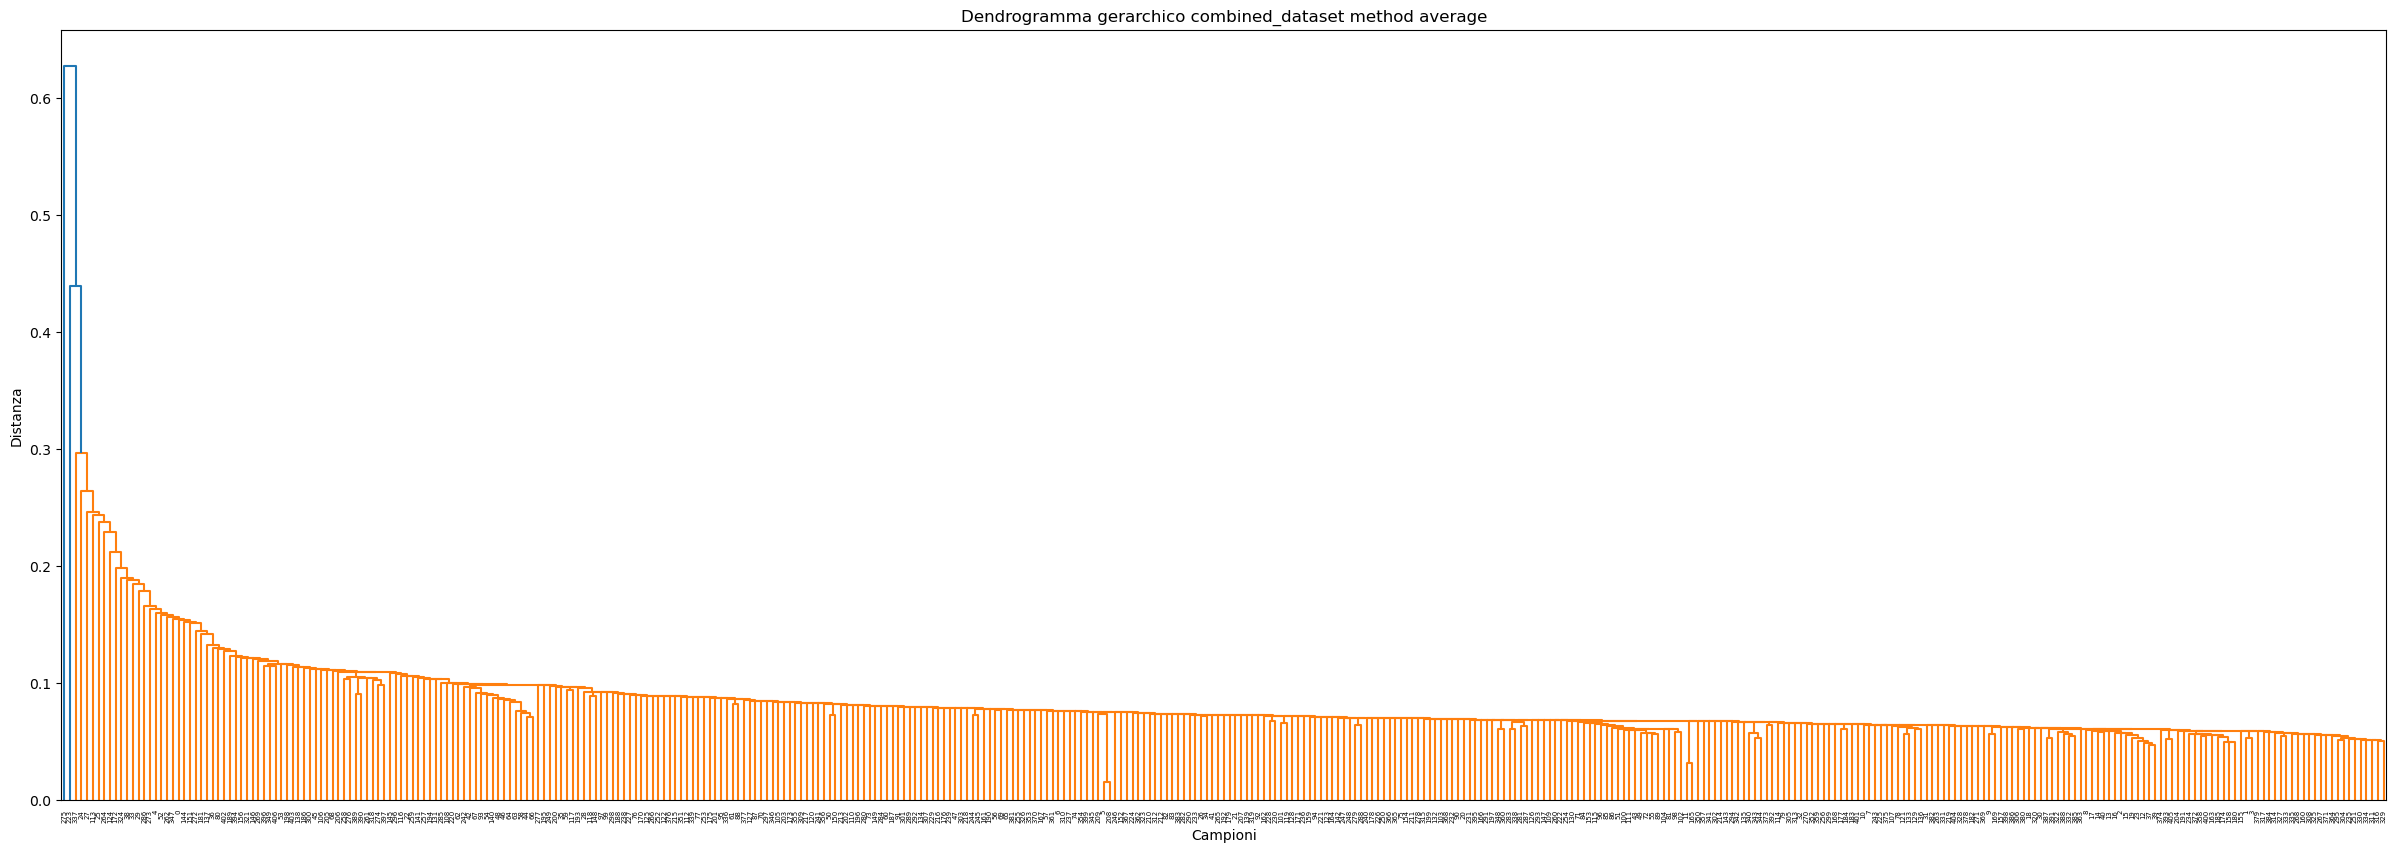

In [186]:
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

# Calcolo della matrice di linkage con il metodo 'complete'
Z = linkage(condensed_cosine_dist_matrix, method='single')

# 🔹 **Visualizzazione del Dendrogramma**
plt.figure(figsize=(30, 10))
dendrogram(Z)  # Nessuna soglia impostata
plt.xlabel("Campioni")
plt.ylabel("Distanza")
plt.title("Dendrogramma gerarchico combined_dataset method average")
plt.show()
